In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Path ke file dalam Google Drive (ganti dengan path sesuai lokasi file di Drive)
file_path = "/content/drive/MyDrive/pesawat.xlsx"

# Membaca file CSV
df = pd.read_excel(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("Informasi Dataset:")
df.info()
print("\n Deskriptif:")
print(df.describe())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118641 entries, 0 to 118640
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   web-scraper-order      118641 non-null  object
 1   web-scraper-start-url  118641 non-null  object
 2   maskapai               116924 non-null  object
 3   tanggal                116924 non-null  object
 4   keberangkatan          116924 non-null  object
 5   Tiba                   116924 non-null  object
 6   durasi                 116924 non-null  object
 7   harga                  118641 non-null  object
dtypes: object(8)
memory usage: 7.2+ MB

 Deskriptif:
        web-scraper-order                              web-scraper-start-url  \
count              118641                                             118641   
unique             118641                                                102   
top     1745249393-118641  https://www.traveloka.com/id-i

In [ ]:
print("Missing values:")
print(df.isnull().sum())

df.dropna(subset=['maskapai', 'tanggal', 'keberangkatan', 'Tiba', 'durasi'], inplace=True)


Missing values:
web-scraper-order           0
web-scraper-start-url       0
maskapai                 1717
tanggal                  1717
keberangkatan            1717
Tiba                     1717
durasi                   1717
harga                       0
dtype: int64


In [ ]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
web-scraper-order        0
web-scraper-start-url    0
maskapai                 0
tanggal                  0
keberangkatan            0
Tiba                     0
durasi                   0
harga                    0
dtype: int64


In [ ]:
df['harga'] = df['harga'].astype(str).str.replace('Rp ', '').str.replace('/org', '').str.replace('.', '').astype(int)

print(df['harga'].head())  # Menampilkan 5 baris pertama untuk melihat hasilnya
print(df['harga'].dtype)   # Memeriksa tipe data kolom 'harga'

0    877880
1    877880
2    877880
3    883173
4    883173
Name: harga, dtype: int64
int64


In [ ]:
# Jumlah total data
print("Jumlah data sebelum menghapus duplikat:", len(df))

# Menampilkan baris yang duplikat
duplicates = df[df.duplicated()]
print("\nJumlah data duplikat:", len(duplicates))
print("\nContoh data duplikat:")
print(duplicates.head())



Jumlah data sebelum menghapus duplikat: 116924

Jumlah data duplikat: 0

Contoh data duplikat:
Empty DataFrame
Columns: [web-scraper-order, web-scraper-start-url, maskapai, tanggal, keberangkatan, Tiba, durasi, harga]
Index: []


In [ ]:
subset_cols = ['maskapai', 'tanggal', 'keberangkatan', 'harga']
duplicates_subset = df[df.duplicated(subset=subset_cols)]

print(f"Jumlah duplikat berdasarkan {subset_cols}: {len(duplicates_subset)}")
print("\nContoh duplikat:")
print(duplicates_subset.head())



Jumlah duplikat berdasarkan ['maskapai', 'tanggal', 'keberangkatan', 'harga']: 86542

Contoh duplikat:
   web-scraper-order                              web-scraper-start-url  \
8       1745234443-9  https://www.traveloka.com/id-id/flight/fullsea...   
9      1745234443-10  https://www.traveloka.com/id-id/flight/fullsea...   
10     1745234443-11  https://www.traveloka.com/id-id/flight/fullsea...   
12     1745234443-13  https://www.traveloka.com/id-id/flight/fullsea...   
13     1745234443-14  https://www.traveloka.com/id-id/flight/fullsea...   

            maskapai tanggal keberangkatan   Tiba durasi    harga  
8   Garuda Indonesia  25 Mar         09:20  11:20  1j 0m  2944821  
9   Garuda Indonesia  25 Mar         09:20  11:20  1j 0m  2944821  
10  Garuda Indonesia  25 Mar         09:20  11:20  1j 0m  2944821  
12  Garuda Indonesia  25 Mar         09:20  11:20  1j 0m  2994413  
13  Garuda Indonesia  25 Mar         09:20  11:20  1j 0m  2994413  


In [ ]:
# Hapus spasi depan-belakang di semua kolom object (teks)
df_clean = df.copy()
for col in df_clean.select_dtypes(include='object'):
    df_clean[col] = df_clean[col].str.strip().str.lower()  # bisa juga .str.title() kalau mau kapitalisasi

# Cek lagi duplikat setelah dibersihkan
duplicates_cleaned = df_clean[df_clean.duplicated()]
print("Jumlah duplikat setelah pembersihan teks:", len(duplicates_cleaned))

# Menghapus duplikat berdasarkan kolom yang sudah ditentukan
df_cleaned = df.drop_duplicates(subset=['maskapai', 'tanggal', 'keberangkatan', 'harga'])

# Mengecek hasil setelah penghapusan duplikat
print(f"Jumlah data setelah menghapus duplikat: {len(df_cleaned)}")

df_cleaned = df.drop_duplicates(subset=['maskapai', 'tanggal', 'keberangkatan', 'harga'])



Jumlah duplikat setelah pembersihan teks: 0
Jumlah data setelah menghapus duplikat: 30382


In [ ]:
# Bersihkan kolom 'durasi' → Konversi ke menit total
def durasi_to_minutes(durasi):
    durasi = durasi.lower()
    jam = 0
    menit = 0
    if 'j' in durasi:
        parts = durasi.split('j')
        jam = int(parts[0].strip())
        if 'm' in parts[1]:
            menit = int(parts[1].replace('m', '').strip())
    elif 'm' in durasi:
        menit = int(durasi.replace('m', '').strip())
    return jam * 60 + menit

df['durasi_menit'] = df['durasi'].apply(durasi_to_minutes)

df_cleaned = df.drop_duplicates(subset=['maskapai', 'tanggal', 'keberangkatan', 'harga'])

# Now print from df_cleaned
print(df_cleaned[['durasi', 'durasi_menit']].head(10))


    durasi  durasi_menit
0    1j 0m            60
1    1j 0m            60
2    1j 0m            60
3    1j 0m            60
4    1j 0m            60
5    1j 0m            60
6    1j 0m            60
7    1j 0m            60
11   1j 0m            60
20  1j 40m           100


In [ ]:
# Ekstrak tahun dari URL (asumsi tahun ada dalam URL seperti .../2024/... )
df['tahun'] = df['web-scraper-start-url'].str.extract(r'(\d{4})')

# Normalisasi nama bulan ke format Inggris
bulan_map = {
    'jan': 'Jan', 'feb': 'Feb', 'mar': 'Mar', 'apr': 'Apr',
    'mei': 'May', 'jun': 'Jun', 'jul': 'Jul', 'agu': 'Aug',
    'sep': 'Sep', 'okt': 'Oct', 'nov': 'Nov', 'des': 'Dec'
}
df['tanggal'] = df['tanggal'].str.lower().replace(bulan_map, regex=True)

# 5. Gabungkan tanggal dan tahun, lalu ubah ke datetime
df['tanggal'] = df['tanggal'] + ' ' + df['tahun']
df['tanggal'] = pd.to_datetime(df['tanggal'], format="%d %b %Y")


In [ ]:
# Kategorisasi musim berdasarkan bulan (khusus Desember - Maret)
# Ekstrak bulan numerik dan nama bulan
import seaborn as sns

df['bulan'] = df['tanggal'].dt.month
df['nama_bulan'] = df['tanggal'].dt.strftime('%B')

# Buat kolom musim berdasarkan tanggal
def musim_detail(tanggal):
    if pd.to_datetime('2025-12-20') <= tanggal <= pd.to_datetime('2025-12-24'):
        return 'Pra Libur Akhir Tahun'
    elif pd.to_datetime('2025-12-25') <= tanggal <= pd.to_datetime('2026-01-02'):
        return 'Puncak Liburan'
    elif pd.to_datetime('2026-01-03') <= tanggal <= pd.to_datetime('2026-01-14'):
        return 'Minggu Tenang'
    elif pd.to_datetime('2026-01-15') <= tanggal <= pd.to_datetime('2026-03-15'):
        return 'Normal Musim Kerja'
    elif pd.to_datetime('2026-03-16') <= tanggal <= pd.to_datetime('2026-03-24'):
        return 'Pra Lebaran Awal'
    elif pd.to_datetime('2026-03-25') <= tanggal <= pd.to_datetime('2026-03-31'):
        return 'Puncak Pra Lebaran'
    else:
        return 'Luar Rentang'

df['musim_detail'] = df['tanggal'].apply(musim_detail)






In [ ]:
# --- ONE-HOT ENCODING MUSIM ---
df_encoded = pd.get_dummies(df, columns=['musim_detail'], prefix='musim')

# --- FITUR DAN TARGET ---
features = ['durasi_menit', 'bulan'] + [col for col in df_encoded.columns if col.startswith('musim_')]
X = df_encoded[features]
y = df_encoded['harga']

In [ ]:
# --- TRAIN TEST SPLIT ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# --- MODEL ---
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

RMSE: 938458.05
R² Score: 0.0077


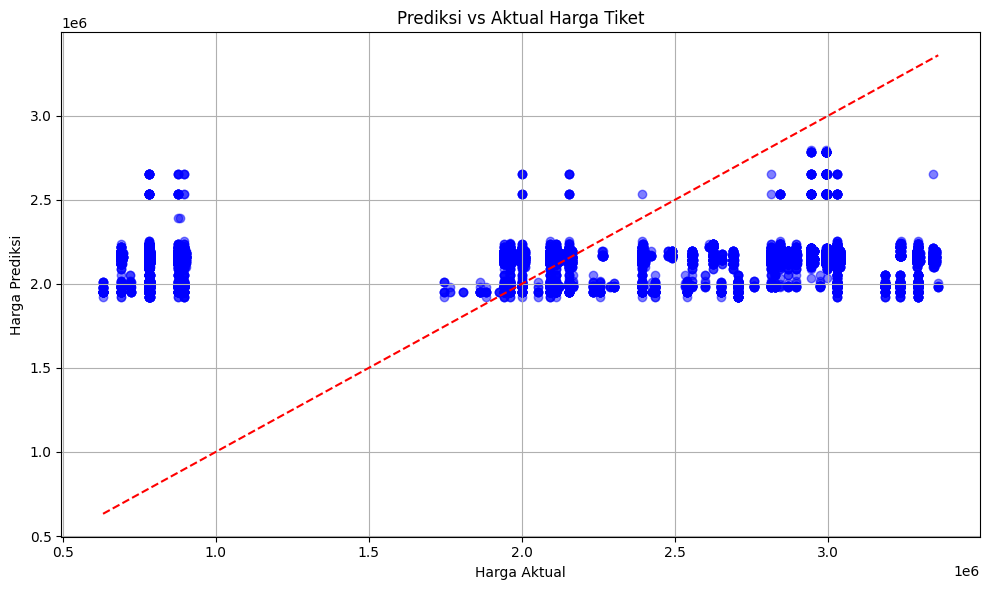

In [ ]:
# --- VISUALISASI PREDIKSI vs AKTUAL ---
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Harga Aktual")
plt.ylabel("Harga Prediksi")
plt.title("Prediksi vs Aktual Harga Tiket")
plt.grid(True)
plt.tight_layout()
plt.show()

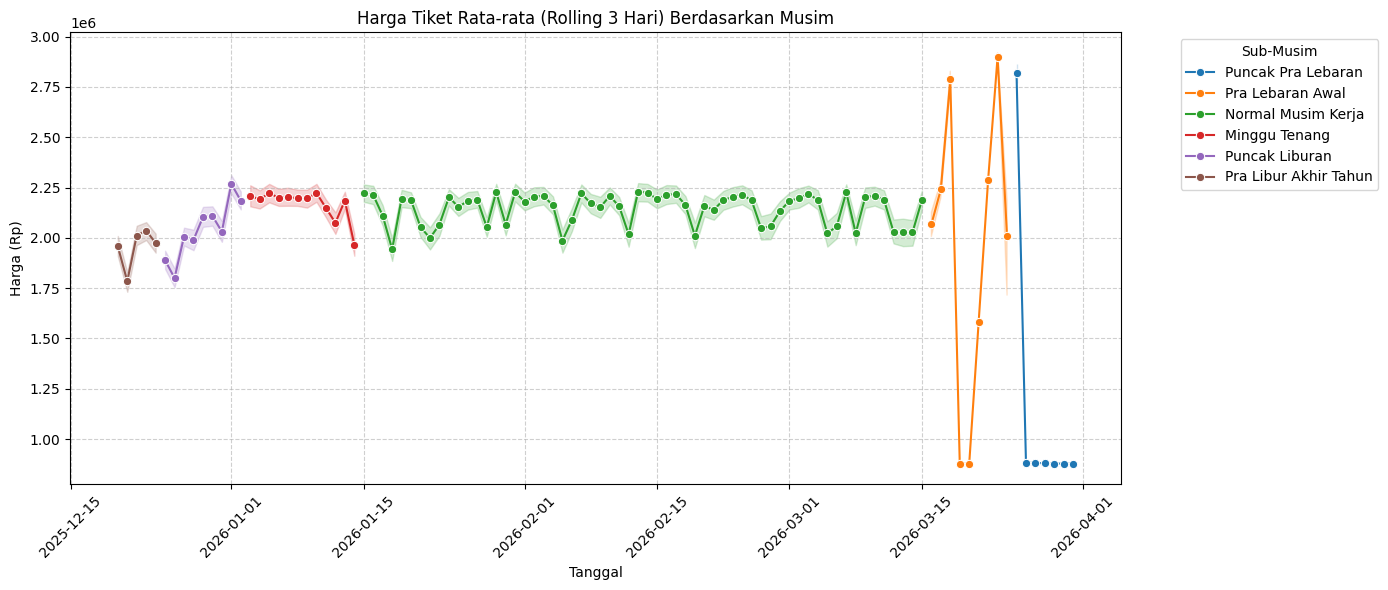

In [ ]:
# --- GRAFIK HARGA RATA-RATA BERDASARKAN MUSIM ---
df['harga_rolling'] = df.groupby('musim_detail')['harga'].transform(lambda x: x.rolling(3, min_periods=1).mean())

plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='tanggal', y='harga_rolling', hue='musim_detail', marker='o', palette='tab10')
plt.title("Harga Tiket Rata-rata (Rolling 3 Hari) Berdasarkan Musim")
plt.ylabel("Harga (Rp)")
plt.xlabel("Tanggal")
plt.xticks(rotation=45)
plt.legend(title='Sub-Musim', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<ipython-input-48-eb9d270ad39e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='musim_detail', y='harga', data=df, palette='Set2')


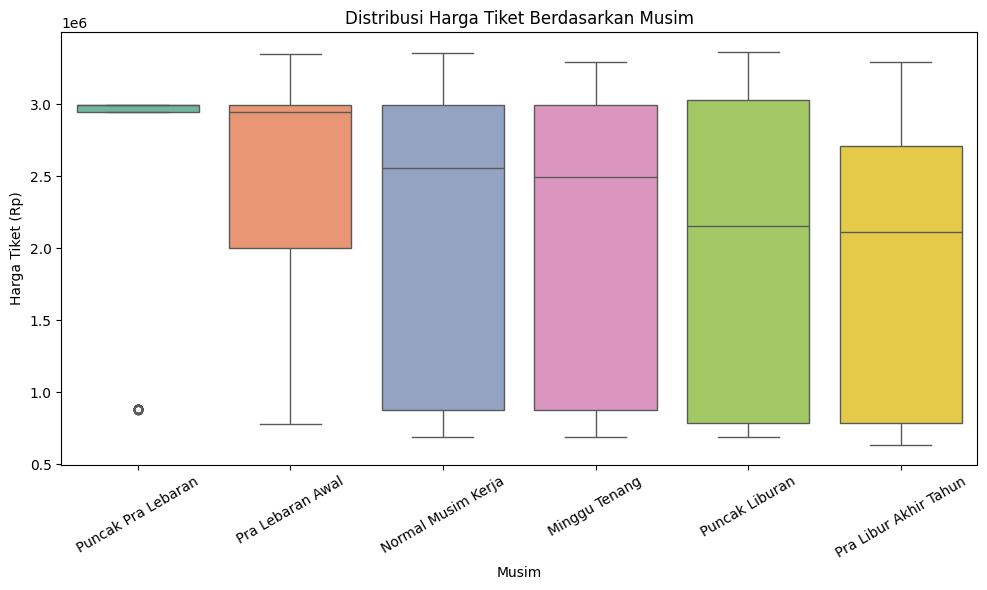

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # Ensure seaborn is also imported in this cell if used

plt.figure(figsize=(10,6))
sns.boxplot(x='musim_detail', y='harga', data=df, palette='Set2')
plt.title("Distribusi Harga Tiket Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Harga Tiket (Rp)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

<ipython-input-49-e2604ec459dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.values, y=avg_price.index, palette='muted')


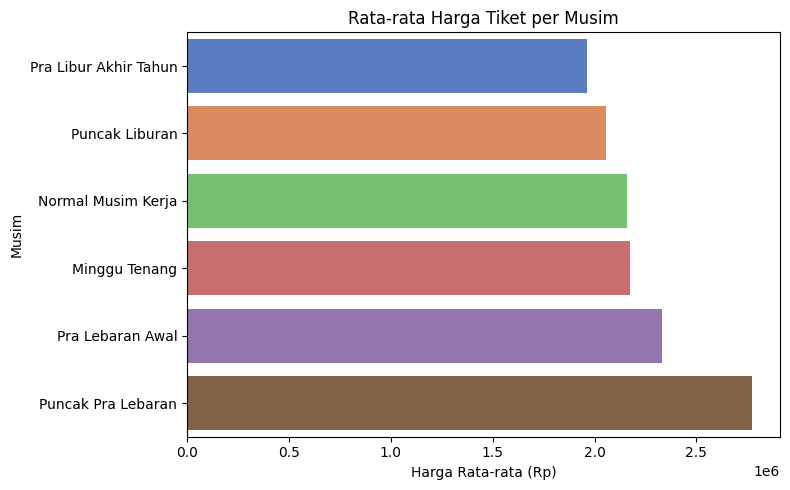

In [ ]:
plt.figure(figsize=(8,5))
avg_price = df.groupby('musim_detail')['harga'].mean().sort_values()
sns.barplot(x=avg_price.values, y=avg_price.index, palette='muted')
plt.title("Rata-rata Harga Tiket per Musim")
plt.xlabel("Harga Rata-rata (Rp)")
plt.ylabel("Musim")
plt.tight_layout()
plt.show()

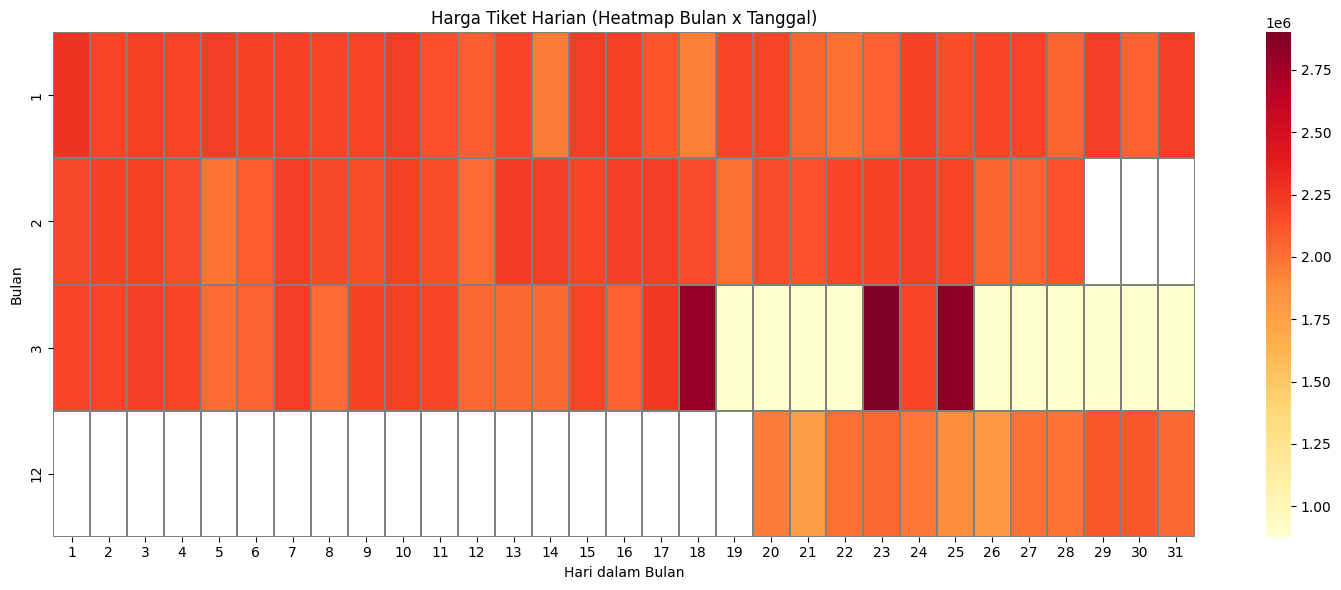

In [ ]:
pivot = df.pivot_table(index=df['tanggal'].dt.month,
                       columns=df['tanggal'].dt.day,
                       values='harga', aggfunc='mean')

plt.figure(figsize=(15,6))
sns.heatmap(pivot, cmap='YlOrRd', linewidths=0.1, linecolor='gray')
plt.title('Harga Tiket Harian (Heatmap Bulan x Tanggal)')
plt.xlabel('Hari dalam Bulan')
plt.ylabel('Bulan')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd


In [ ]:
df_ts = df[['tanggal', 'harga']].copy()
df_ts = df_ts.groupby('tanggal').mean()
df_ts = df_ts.asfreq('D')
df_ts['harga'] = df_ts['harga'].interpolate(method='linear')
df_ts.head()

,harga
tanggal,
2025-12-20,1.957889e+06
2025-12-21,1.784379e+06
2025-12-22,2.010873e+06
2025-12-23,2.036090e+06
2025-12-24,1.975939e+06


In [ ]:
!pip install pmdarima

In [ ]:
# Filter hanya maskapai Garuda
df_garuda = df[df['maskapai'].str.contains('garuda', case=False)].copy()

# Hitung rata-rata harga per hari
ts = df_garuda.groupby('tanggal')['harga'].mean()

# Jadikan time series harian
ts = ts.asfreq('D')  # 'D' = daily frequency

ts = ts.interpolate()

ts = ts[ts > 1_000_000]  # asumsi harga wajar di atas 1 juta
ts = ts.interpolate(method='linear')

# Tampilkan beberapa baris awal
ts.head()


,harga
tanggal,
2025-12-20,1.957889e+06
2025-12-21,1.784379e+06
2025-12-22,2.010873e+06
2025-12-23,2.036090e+06
2025-12-24,1.975939e+06


In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(ts)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -1.4569791942681694
p-value: 0.5546757344312654


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(ts, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
forecast = model_fit.forecast(steps=30)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
forecast_index = pd.date_range(start=ts.index[-1] + pd.Timedelta(days=1), periods=30)
forecast_series = pd.Series(forecast.values, index=forecast_index)